In [6]:
%reload_ext autoreload
%autoreload 2
default_figsize=(14,12)

In [7]:
import datasets
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
dataset_names = datasets.dataset_names.copy()
dataset_name = "liu"
dataset = dataset_names[dataset_name]
x,y,metadata = dataset.load(dropna=True)
y = datasets.map_y_em(y,dataset_name)

#xy=pd.concat([x,y])#.join(y)
xy = x.merge(y,left_index=True,right_index=True)
xy.describe()

,umag,gmag,rmag,imag,Hamag,Jmag,Hmag,Kmag,em
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,15.111851,14.504733,13.592100,12.929715,13.175018,12.020854,11.785267,11.635587,0.341637
std,1.816931,1.652762,1.077114,1.025982,1.155292,1.105942,1.167985,1.205151,0.475105
min,10.980000,10.130000,11.820000,11.100000,11.160000,9.060000,8.910000,8.510000,0.000000
25%,13.840000,13.140000,12.650000,12.070000,12.100000,11.350000,11.100000,10.970000,0.000000
50%,14.630000,14.560000,13.580000,12.820000,13.140000,11.810000,11.620000,11.550000,0.000000
75%,16.180000,15.880000,14.400000,13.660000,14.010000,12.730000,12.550000,12.430000,1.000000
max,23.710000,18.130000,16.470000,16.310000,16.300000,16.310000,16.210000,16.000000,1.000000


# Variable visualization

<AxesSubplot:xlabel='em', ylabel='value'>

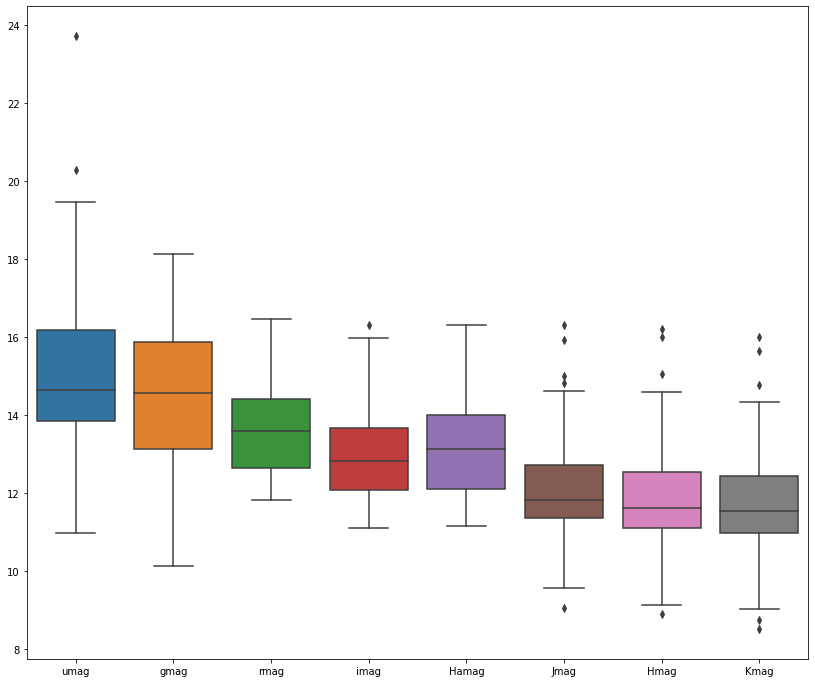

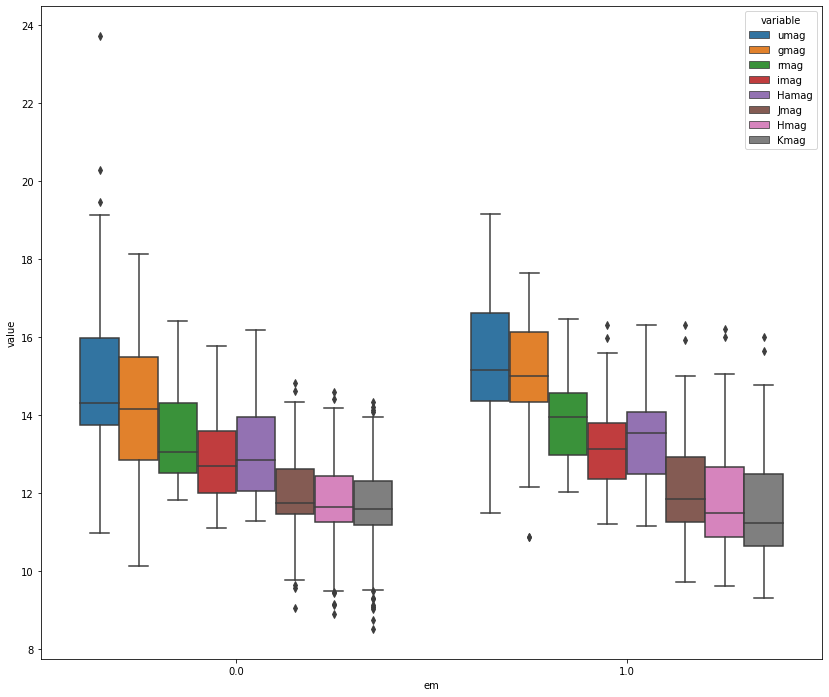

In [8]:
#x.boxplot(figsize=(14,12))
#_=xy.boxplot(by="em",figsize=(14,12))
plt.figure(figsize=default_figsize)
sn.boxplot(data=x)


plt.figure(figsize=default_figsize)
xy_long = pd.melt(xy, id_vars='em')
sn.boxplot(x='em', y='value', hue='variable', data=xy_long)

# 
# sn.boxplot(data=x,x=y["em"])

<AxesSubplot:>

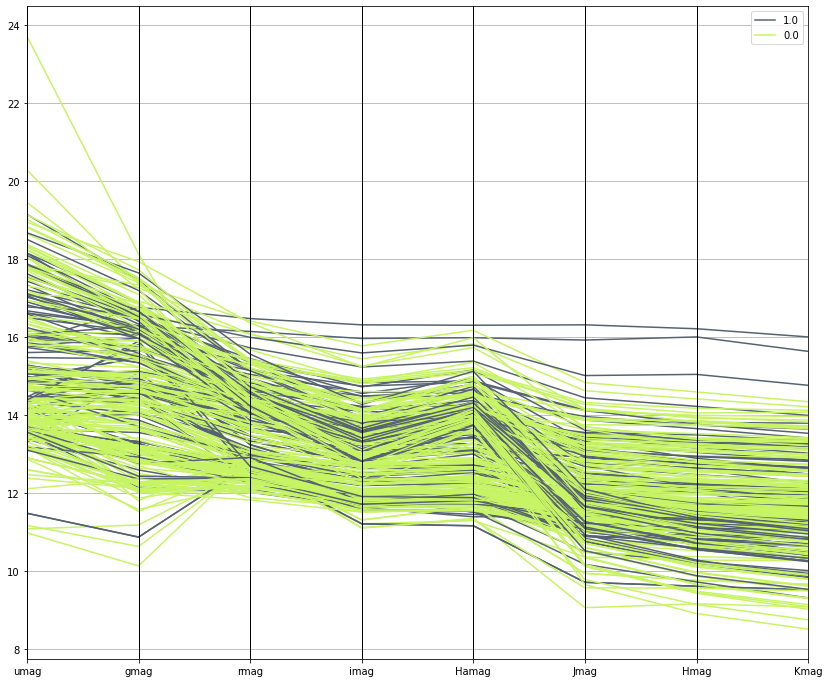

In [9]:
plt.figure(figsize=(14,12))
pd.plotting.parallel_coordinates(xy,"em",color=('#556270','#C7F464'))

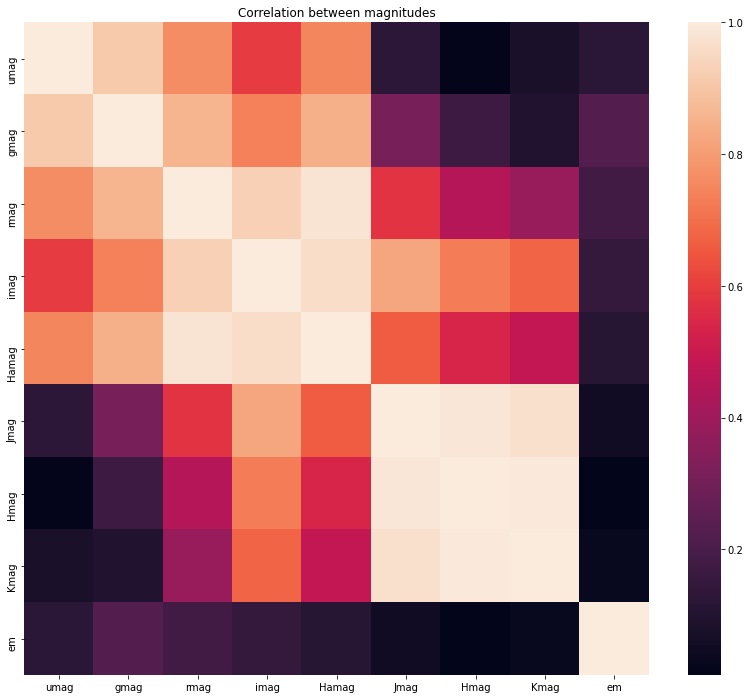

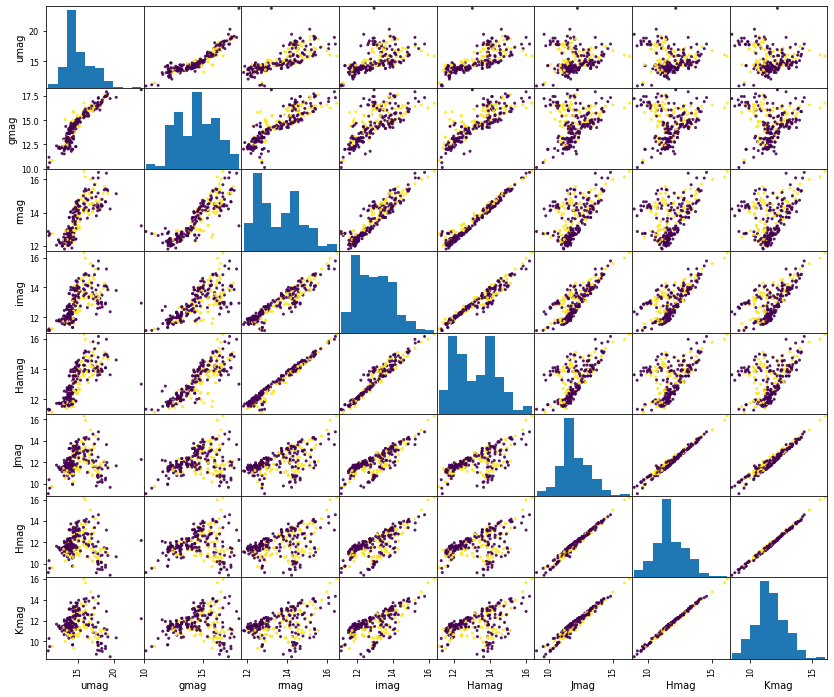

In [10]:
f=plt.figure(figsize = (14,12))
sn.heatmap(xy.corr().abs())
plt.title("Correlation between magnitudes")
plt.show()

axes=pd.plotting.scatter_matrix(x,c=y["em"],alpha=0.9,grid=False,figsize=(14,12))

plt.show()

# Outlier detection via confidence interval

In [11]:
from scipy import stats
m = len(x.columns) # number of columns = number of hypothesis
confidence= 0.99  
adjusted_confidence = 1- (1-confidence)/m  # bonferroni-adjusted confidence 
max_zscore = stats.norm.ppf(adjusted_confidence)
print(f"Confidence  (desired): {confidence}")
print(f"Confidence (adjusted): {adjusted_confidence}")
print(f"Z-score    (adjusted): {max_zscore}")

indices = (np.abs(stats.zscore(x-x.mean())) > max_std).any(axis=1)
outliers_x = x[indices]
outliers_x

Confidence  (desired): 0.99
Confidence (adjusted): 0.99875
Z-score    (adjusted): 3.023341439739154


NameError: name 'max_std' is not defined

# Outlier detection via IQR

In [ ]:
iqr_factor=1.5
q25,q75=x.quantile(0.25),x.quantile(0.75)
iqr=q75-q25
min_values = q25-iqr_factor*iqr
max_values = q75+iqr_factor*iqr


indices = (np.logical_or(x<min_values,x>max_values)).any(axis=1)
# print(indices)
outliers_x = x[indices]
outliers_x

# Analysis of q-features ($q_3$) (all magnitudes)

In [ ]:
x_np=x.to_numpy()
import qfeatures
coefficients = dataset.coefficients
systems = dataset.systems
coefficients_np = np.array([coefficients[k] for k in x.columns])
systems = [systems[k] for k in x.columns]
q=qfeatures.calculate(x_np,coefficients_np,x.columns,systems,combination_size=3)
print(x_np.shape,x_np.min(),x_np.max())
m = q.magnitudes
print(m.shape,m.min(),m.max())

q_df = pd.DataFrame(m, columns = [q.column_names])
q_df.describe()

In [ ]:
f=plt.figure(figsize = (14,12))
sn.heatmap(q_df.corr().abs())
plt.title("Correlation between q-features")
plt.show()

# Analysis of q-features ($q_3$) (calculated by system)



In [ ]:
x_np=x.to_numpy()
import qfeatures
coefficients = dataset.coefficients
systems = dataset.systems
coefficients_np = np.array([coefficients[k] for k in x.columns])
systems = [systems[k] for k in x.columns]
q=qfeatures.calculate(x_np,coefficients_np,x.columns,systems,combination_size=3,by_system=True)

m = q.magnitudes

q_df = pd.DataFrame(m, columns = [q.column_names])
q_df.describe()


In [ ]:

f=plt.figure(figsize = (14,12))
sn.heatmap(q_df.corr().abs())
plt.title("Correlation between q-features (calculated with same system magnitudes)")
plt.show()

f=plt.figure(figsize = (14,12))
axes=pd.plotting.scatter_matrix(q_df,c=y["em"],alpha=0.9,grid=False,figsize=(12,12))
plt.suptitle("Scatter plots between q-features")
plt.show()